# Who Mentioned Who Networks

In this notebook we want to visualize who mentioned who in the **fake covid-19 dataset**. We think that the mention concept on Twitter is the best way to represent an interaction in the platform. 

The graph structure is **USER X's tweet ==mentioned==> USER Y**

All the nodes have the same color, the color of the edge is based on its category (false or partially false)

In [1]:
import json
import pandas as pd
import networkx as nx
from pyvis.network import Network
import csv
import itertools

csv_dataframe = pd.read_csv('dataset/FINAL_fakecovid_final_filtered_dataset_clean.csv',sep=";")
csv_dataframe['tweet_id'] = csv_dataframe['tweet_id'].astype(str)
csv_list = csv_dataframe.values.tolist()
lista_unica_csv=list(itertools.chain.from_iterable(csv_list))

data = []
with open('dataset/fakecovid_result_final_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

Let's create the graphs and visualize them:

In [29]:
index = 0
source = []
dest = []
edges = []
nodes = []
G = nx.MultiDiGraph()
for el in data:
    token_id = el['id_str']
    indice_csv = lista_unica_csv.index(token_id)
    for e in el['entities']['user_mentions']:
        #source.append(el['user']['screen_name'])
        #dest.append(e['screen_name'])
        #print(el['user']['screen_name'] + "=>" + e['screen_name'] + " " + lista_unica_csv[indice_csv+1].lower())
        nodes.append(el['user']['screen_name'])
        nodes.append(e['screen_name'])
        edges.append((el['user']['screen_name'],e['screen_name']))
        if lista_unica_csv[indice_csv+1].lower()=="false":
            G.add_nodes_from(nodes,color="#005AB5")
            G.add_edges_from(edges,color="#DC3220")
        else:
            G.add_nodes_from(nodes,color="#005AB5")
            G.add_edges_from(edges,color="#00BED8")
        edges = []
        nodes = []


net = Network(width="100%",notebook=True, directed=True, heading="Who Mentioned Who Networks")
net.from_nx(G)
#net.show_buttons()
net.set_edge_smooth('dynamic')
net.show("mentions_networks.html")

## Legenda 
**(Zoom in the networks to see their details. The chart is interactive.)**

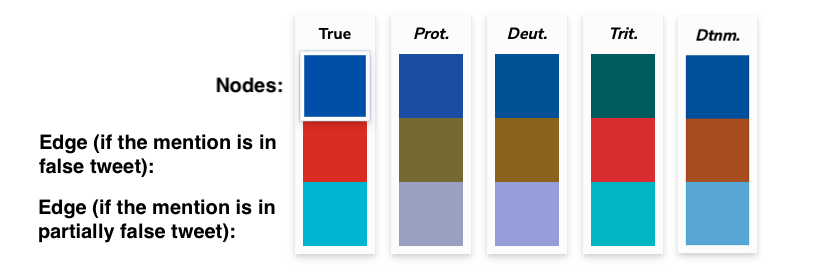

### <a href="a.html" target="_blank">Watch the networks in another window</a>